## Exercise 5 : Classification Tree

### Objective

Note that our Housing Data has a Binary (two-level) Categorical Variable named “CentralAir”, with values “Y” and “N”.
In the previous sessions, we have seen some numeric variables in this dataset that are important to predict “SalePrice”.
In this lab session, we will try to predict if a house has Central Air Conditioning or not using some other variables. 
 
Typical steps to follow while building a supervised machine learning model on a given dataset:  
o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.  
o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.  
o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.  
o Check the Prediction Accuracy of the model on both the Train and the Test sets using the “Confusion Matrix”.  

---

### Preparation and Libraries Import

Import numpy, pandas, seaborn, matplotlib

In [512]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [513]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

---

### Import the Dataset

In [514]:
trainData = pd.read_csv("train.csv")
trainData.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [515]:
print("Data type : ", type(trainData))
print("Data dims : ", trainData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [516]:
print(trainData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [517]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


---
### Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.  

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max
depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.


/Users/isaac/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

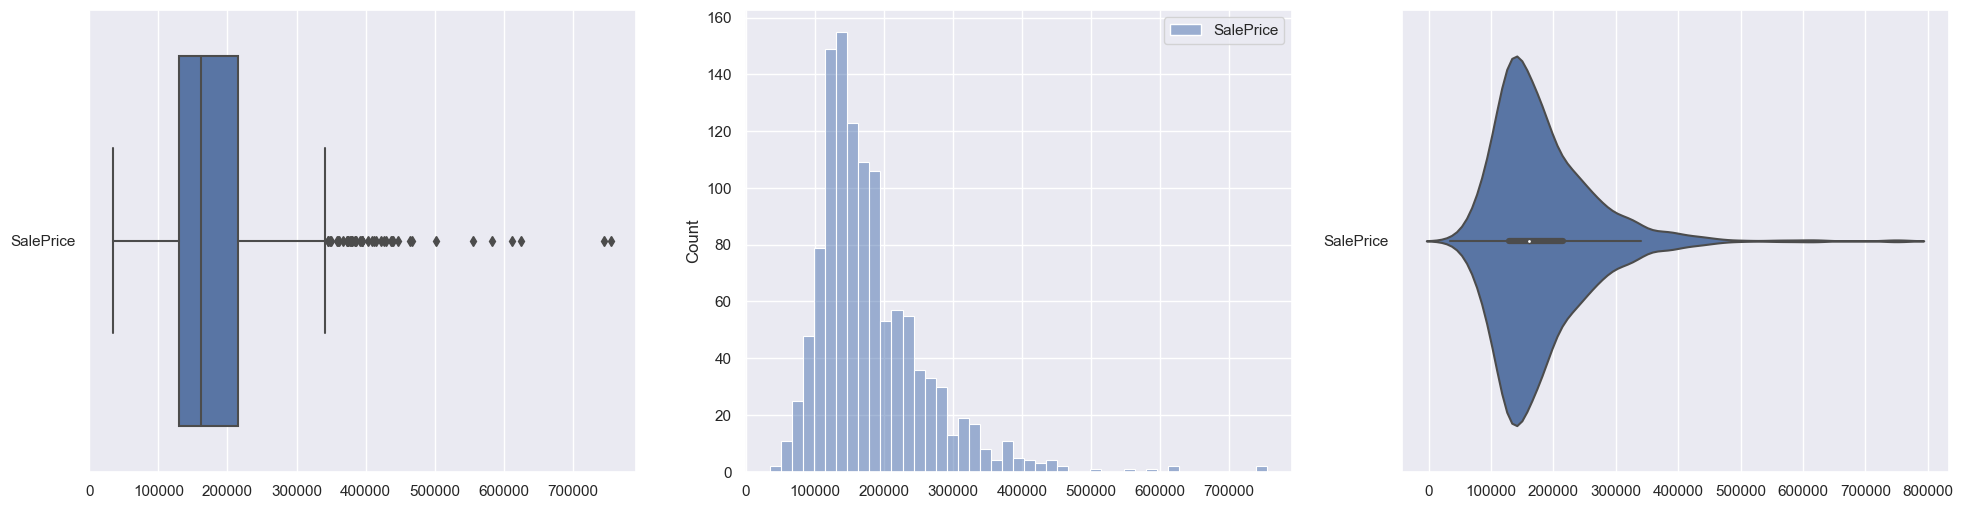

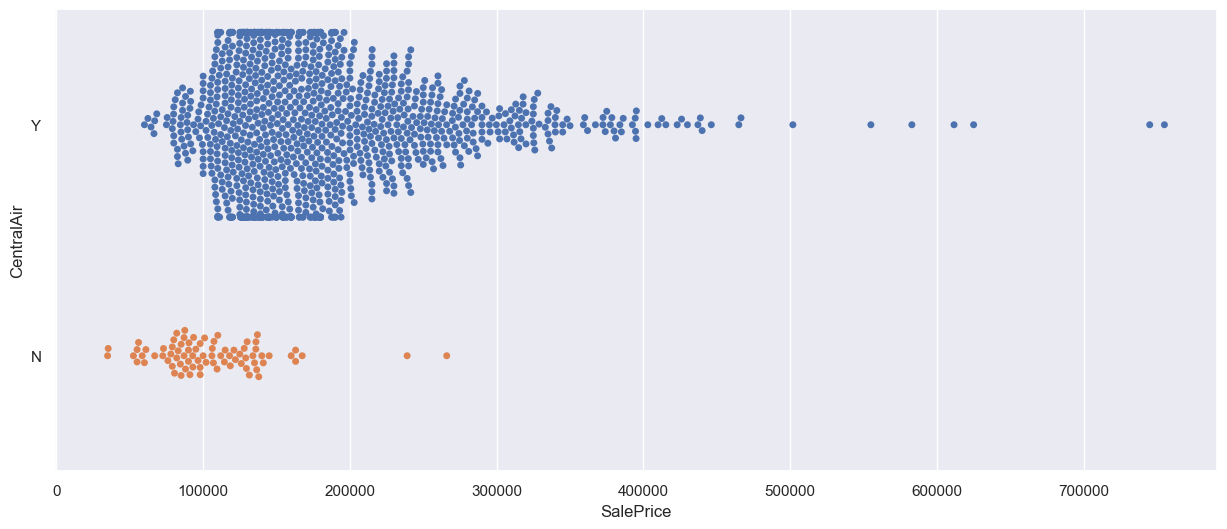

In [518]:
#Import SalePrice and CentralAir from the Data set
salePrice = pd.DataFrame(trainData["SalePrice"])
centralAir = pd.DataFrame(trainData["CentralAir"])

#Split data set to 80:20 using train_test_split, x be salePrice, y is centralAir
x_train, x_test, y_train, y_test = train_test_split(salePrice, centralAir, test_size = 0.2, random_state=100)

#Concat 2 df and reindex
trainDF = pd.concat([x_train,y_train], axis = 1).reindex(x_train.index)

#Plot the plots of the sale price
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = x_train, orient = "h", ax = axes[0])
sb.histplot(data = x_train, ax = axes[1])
sb.violinplot(data = x_train, orient = "h", ax = axes[2])
#Do a swarm plot to visualize both SalePrice and Central Air together
f = plt.figure(figsize = (15,6))
sb.swarmplot(data = trainDF, x = "SalePrice", y = "CentralAir", orient = "h")

---
### Decision Tree

##### Decision Tree 1 (Max Depth = 2)

[Text(0.5, 0.8333333333333334, 'SalePrice <= 98150.0\ngini = 0.126\nsamples = 1168\nvalue = [79, 1089]\nclass = Y'),
 Text(0.25, 0.5, 'SalePrice <= 59250.0\ngini = 0.499\nsamples = 84\nvalue = [40, 44]\nclass = Y'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = N'),
 Text(0.375, 0.16666666666666666, 'gini = 0.49\nsamples = 77\nvalue = [33, 44]\nclass = Y'),
 Text(0.75, 0.5, 'SalePrice <= 137950.0\ngini = 0.069\nsamples = 1084\nvalue = [39, 1045]\nclass = Y'),
 Text(0.625, 0.16666666666666666, 'gini = 0.178\nsamples = 303\nvalue = [30, 273]\nclass = Y'),
 Text(0.875, 0.16666666666666666, 'gini = 0.023\nsamples = 781\nvalue = [9, 772]\nclass = Y')]

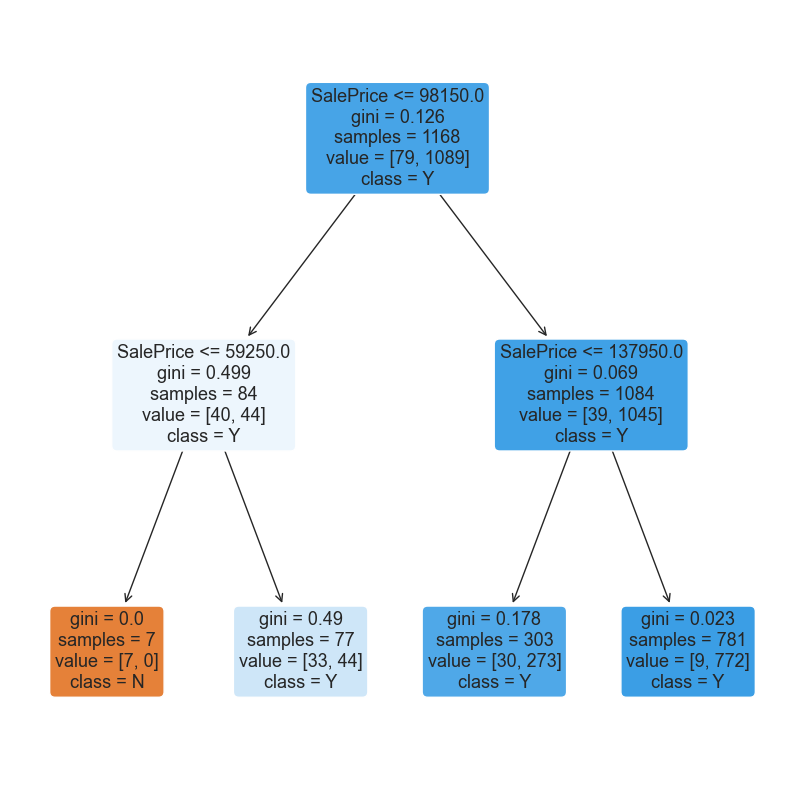

In [519]:
decTree1 = DecisionTreeClassifier(max_depth = 2)
decTree1.fit(x_train,y_train)
f = plt.figure(figsize =(10,10))
plot_tree(decTree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

##### Decision Tree 2 (Max Depth = 4)

[Text(0.359375, 0.9, 'SalePrice <= 98150.0\ngini = 0.126\nsamples = 1168\nvalue = [79, 1089]\nclass = Y'),
 Text(0.125, 0.7, 'SalePrice <= 59250.0\ngini = 0.499\nsamples = 84\nvalue = [40, 44]\nclass = Y'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = N'),
 Text(0.1875, 0.5, 'SalePrice <= 97750.0\ngini = 0.49\nsamples = 77\nvalue = [33, 44]\nclass = Y'),
 Text(0.125, 0.3, 'SalePrice <= 96750.0\ngini = 0.482\nsamples = 74\nvalue = [30, 44]\nclass = Y'),
 Text(0.0625, 0.1, 'gini = 0.486\nsamples = 72\nvalue = [30, 42]\nclass = Y'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Y'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.59375, 0.7, 'SalePrice <= 137950.0\ngini = 0.069\nsamples = 1084\nvalue = [39, 1045]\nclass = Y'),
 Text(0.4375, 0.5, 'SalePrice <= 137700.0\ngini = 0.178\nsamples = 303\nvalue = [30, 273]\nclass = Y'),
 Text(0.375, 0.3, 'SalePrice <= 107450.0\ngini = 0.174\nsamples = 302\nvalue = [29,

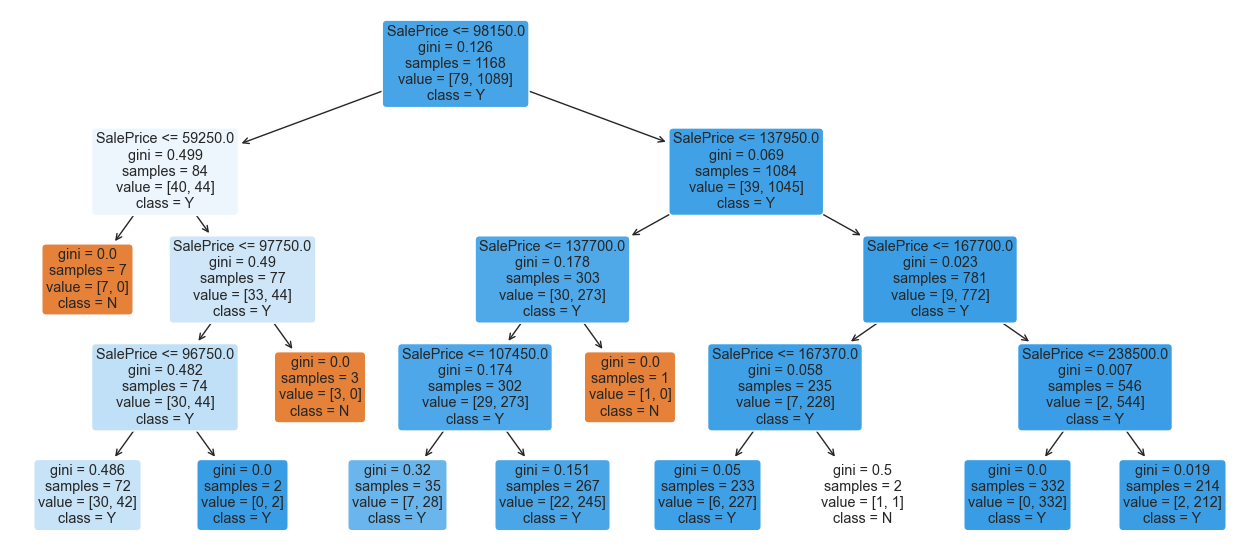

In [520]:
#Declare tree
decTree2 = DecisionTreeClassifier(max_depth = 4)
#Fit the tree
decTree2.fit(x_train,y_train)
#Plot tree
f = plt.figure(figsize =(16,7))
plot_tree(decTree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both
the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

Model 1 (Max Depth = 2)
	 Train Set Confusion Matrix 						 Test Set Confusion Matrix


<AxesSubplot:>

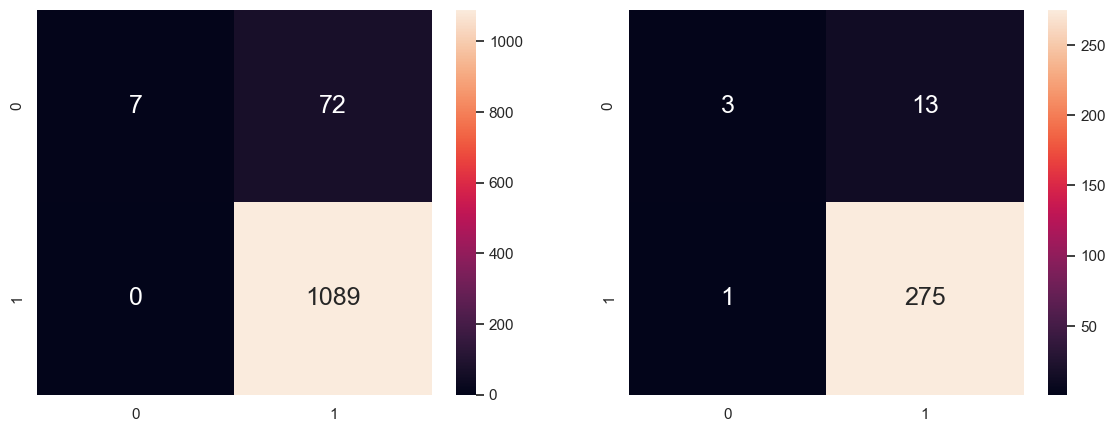

In [521]:
#Checking goodness of fit for the first tree (max depth = 2)
train_pred1 = decTree1.predict(x_train)
test_pred1 = decTree1.predict(x_test)

print("Model 1 (Max Depth = 2)")
print("\t Train Set Confusion Matrix \t\t\t\t\t\t Test Set Confusion Matrix")
#Print confusion matrix for train and test for model
f,axes = plt.subplots(1,2, figsize = (14,5))
sb.heatmap(confusion_matrix(y_train,train_pred1), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test,test_pred1), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[1])

Model 2 (Max Depth = 2)
	 Train Set Confusion Matrix 						 Test Set Confusion Matrix


<AxesSubplot:>

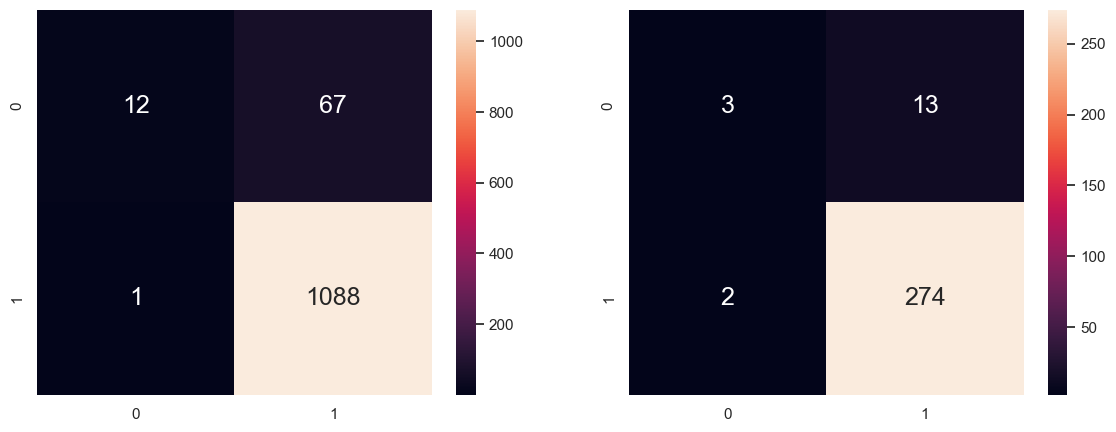

In [522]:
#Check goodness of fit for second tree (max depth = 4)
train_pred2 = decTree2.predict(x_train)
test_pred2 = decTree2.predict(x_test)

print("Model 2 (Max Depth = 2)")
print("\t Train Set Confusion Matrix \t\t\t\t\t\t Test Set Confusion Matrix")
#Print confusion matrix for train and test for model
f,axes = plt.subplots(1,2, figsize = (14,5))
sb.heatmap(confusion_matrix(y_train,train_pred2), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test,test_pred2), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[1])

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [523]:
def calculateMetrics(true, pred):
    #Access confusion matrix by it's array indices
    confusionMatrix = confusion_matrix(true,pred)
    #Get the data from the true positives/negatives or false positives/negatives
    trueNegative = confusionMatrix[0][0]
    falsePositive = confusionMatrix[0][1]
    falseNegative = confusionMatrix[1][0]
    truePositive =  confusionMatrix[1][1]
    truePositiveRate = truePositive / (truePositive + falseNegative)
    falsePositiveRate = falsePositive / (falsePositive + trueNegative)
    return (truePositiveRate, falsePositiveRate)

#Print out for each of the trees
trainMetrics1 = calculateMetrics(y_train,train_pred1)
testMetrics1 = calculateMetrics(y_test, test_pred1)
trainMetrics2 = calculateMetrics(y_train,train_pred2)
testMetrics2 = calculateMetrics(y_test, test_pred2)

Print out classification accuracy, true positive rate and false positive rates for the two models  

In [524]:
#Print the classification accuracy, tpr and fpr for both models
print("Model 1 (Max Depth = 2)")
print("Classification Accuracy [Train]:\t", decTree1.score(x_train,y_train))
print("Classification Accuracy [Test]: \t", decTree1.score(x_test,y_test))
print("True Positive Rate [Train]: \t\t", trainMetrics1[0])
print("False Positive Rate [Train]: \t\t", trainMetrics1[1])
print("True Positive Rate [Test]: \t\t",testMetrics1[0])
print("False Positive Rate [Test]: \t\t",testMetrics1[1])

print()

#Model 2 print
print("Model 2 (Max Depth = 4)")
print("Classification Accuracy [Train]: \t", decTree2.score(x_train,y_train))
print("Classification Accuracy [Test]: \t", decTree2.score(x_test,y_test))
print("True Positive Rate [Train]: \t\t", trainMetrics2[0])
print("False Positive Rate [Train]: \t\t", trainMetrics2[1])
print("True Positive Rate [Test]: \t\t",testMetrics2[0])
print("False Positive Rate [Test]: \t\t",testMetrics2[1])


Model 1 (Max Depth = 2)
Classification Accuracy [Train]:	 0.9383561643835616
Classification Accuracy [Test]: 	 0.952054794520548
True Positive Rate [Train]: 		 1.0
False Positive Rate [Train]: 		 0.9113924050632911
True Positive Rate [Test]: 		 0.9963768115942029
False Positive Rate [Test]: 		 0.8125

Model 2 (Max Depth = 4)
Classification Accuracy [Train]: 	 0.9417808219178082
Classification Accuracy [Test]: 	 0.9486301369863014
True Positive Rate [Train]: 		 0.9990817263544536
False Positive Rate [Train]: 		 0.8481012658227848
True Positive Rate [Test]: 		 0.9927536231884058
False Positive Rate [Test]: 		 0.8125


### Conclusion 

Model 1 (Max Depth 2)  
Model 2 (Max Depth 4)

Comparing both Model 1 and 2, we can observe that the classification accuracy of both models are around the same, although Model 2 classification accuracy is slightly better on the train set than Model 1.  

However, observing the classification accuracy for both models on the test set, the classification accuracy on the test set for Model 1 is slightly better on the test set as well than Model 2. Also, the True Positive Rate of model 1 is also slightly higher than model 2.

I conclude that Model 1 is better.

---
### Problem 2 : Predicting CentralAir using Other Variables
Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to
predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

Hints and Pointers  
o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.  
o Optional: You may think of writing a simple Python function to do classification on variable(s) in a given dataset.

In [525]:
#Import the two new variables as df
overallQual = pd.DataFrame(trainData["OverallQual"])
yearBuilt = pd.DataFrame(trainData["YearBuilt"])


Metrics for OverallQual <-> CentralAir
Classification Accuracy [Train]: 	 0.9383561643835616
Classification Accuracy [Test]: 	 0.9452054794520548

True Positive Rate [Train]: 		 0.9944903581267218
False Positive Rate [Train]: 		 0.8354430379746836
True Positive Rate [Test]: 		 0.9891304347826086
False Positive Rate [Test]: 		 0.8125
------
Metrics for YearBuilt <-> CentralAir
Classification Accuracy [Train]: 	 0.9357876712328768
Classification Accuracy [Test]: 	 0.9417808219178082

True Positive Rate [Train]: 		 0.995417048579285
False Positive Rate [Train]: 		 0.9090909090909091
True Positive Rate [Test]: 		 0.9963503649635036
False Positive Rate [Test]: 		 0.8888888888888888


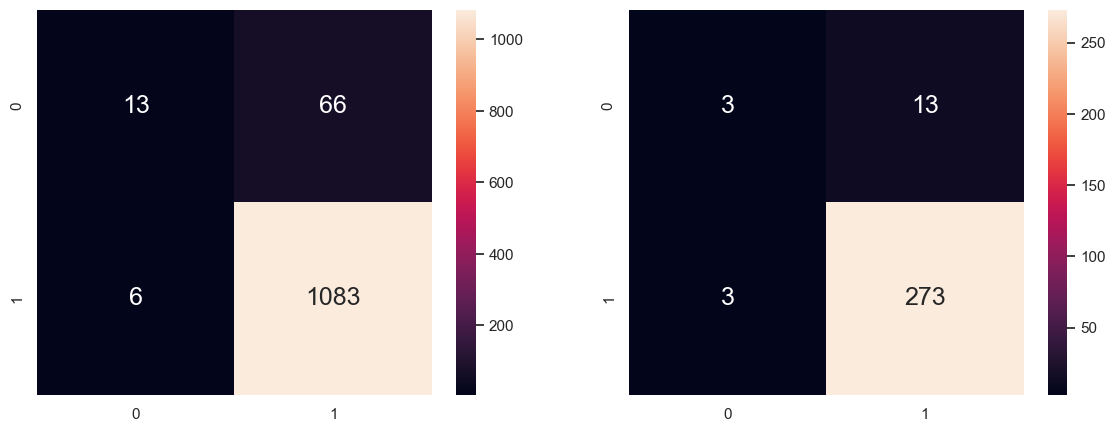

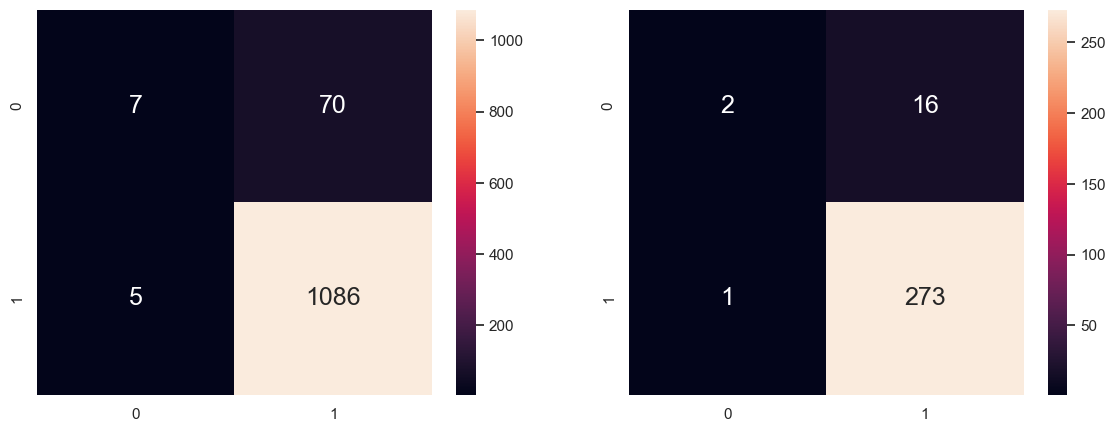

In [533]:
#Declare a helper function to do binary classification.
def binaryClassification(predictor, response, testSize = 0.2, maxDepth = 4, showConfusionMatrix = True, showTree = False):
    #Split the data set into train and set
    x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size= testSize)
    #Make the decision tree
    decTree = DecisionTreeClassifier(max_depth = maxDepth)
    decTree.fit(x_train,y_train)
    #Predict response
    train_pred = decTree.predict(x_train)
    test_pred = decTree.predict(x_test)

    #Calculate the metrics
    trainMetrics = calculateMetrics(y_train, train_pred)
    testMetrics = calculateMetrics(y_test, test_pred)
    
    #Store the score to be removed later
    trainScore = decTree.score(x_train,y_train)
    testScore = decTree.score(x_test,y_test)

    if(showConfusionMatrix):
        #Print confusion matrix for train and test for model
        f,axes = plt.subplots(1,2, figsize = (14,5))
        sb.heatmap(confusion_matrix(y_train,train_pred), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[0])
        sb.heatmap(confusion_matrix(y_test,test_pred), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[1])
    
    if(showTree):
        #Plot tree
        f = plt.figure(figsize =(10,10))
        plot_tree(decTree, filled=True, rounded=True, 
                feature_names=["SalePrice"], 
                class_names=["N","Y"])

    #Print goodness of fit of both train and test
    print("Classification Accuracy [Train]: \t", trainScore)
    print("Classification Accuracy [Test]: \t", testScore)
    print()
    #Print the true positive rate and false positive rates for both train and test
    print("True Positive Rate [Train]: \t\t", trainMetrics[0])
    print("False Positive Rate [Train]: \t\t", trainMetrics[1])
    print("True Positive Rate [Test]: \t\t",testMetrics[0])
    print("False Positive Rate [Test]: \t\t",testMetrics[1])

    return 

print()
print("Metrics for OverallQual <-> CentralAir")
binaryClassification(overallQual, centralAir)
print("------")
print("Metrics for YearBuilt <-> CentralAir")
binaryClassification(yearBuilt, centralAir)

We can conclude that OverallQual is better as the clasification accuracy on the test set is higher than YearBuilt, and the False Positive Rate of OverallQual is lower than the YearBuilt model. Hence, OverallQual is better.

### Problem 3 : Understanding the Misclassified Samples

In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

Hints and Pointers  
o In Part (a), you may print the model in Problem 1(a), or fit the max depth 4 classification tree model once again.  
o You may simply “observe” which leaf node has the maximum number of False Positives; no need to code for it.  
o Think about how data points (samples) end up in a leaf node based on tree splits; it will help you isolate samples.  
o Part (b) is a simple continuation of part (a), where you need to “filter” out the False Positives from the samples.

(a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree
represents a specific partition of your training data, based on certain conditions given by the splits in the tree.
Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and
print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.


Model 2 (Max Depth = 4)
		Train Set Confusion Matrix 					   Test Set Confusion Matrix


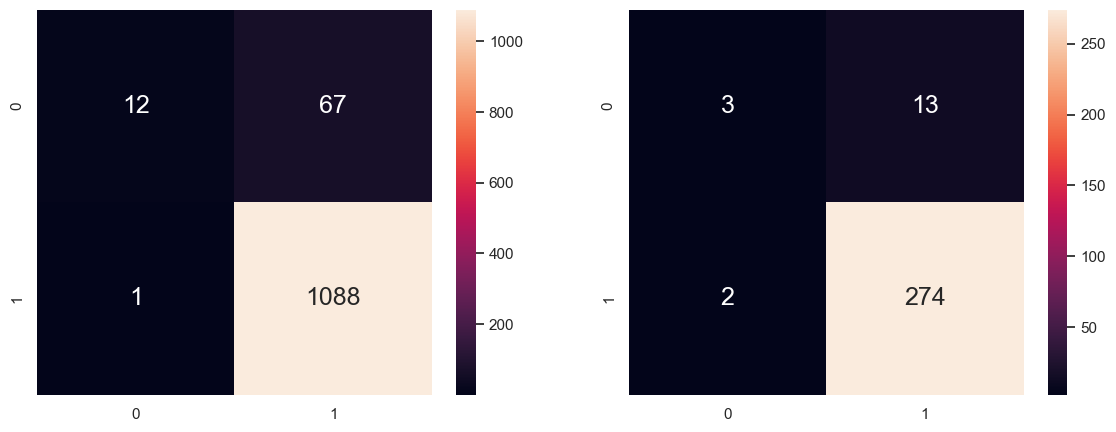

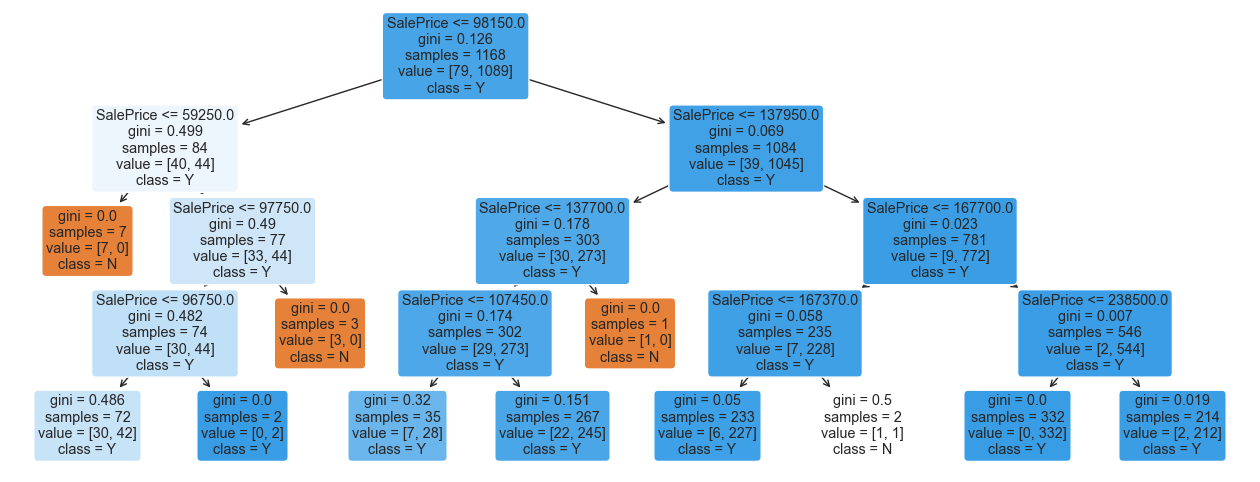

In [527]:
#It was decTree2 that had maxDepth 4. Print the tree out first
print("Model 2 (Max Depth = 4)")
print("\t\tTrain Set Confusion Matrix \t\t\t\t\t   Test Set Confusion Matrix")
#Print confusion matrix for train and test for model
f,axes = plt.subplots(1,2, figsize = (14,5))
sb.heatmap(confusion_matrix(y_train,train_pred2), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test,test_pred2), annot = True, fmt = ".0f", annot_kws ={"size":18}, ax = axes[1])

f = plt.figure(figsize =(16,6))
x = plot_tree(decTree2, filled=True, rounded=True, 
        feature_names=["SalePrice"], 
        class_names=["N","Y"])

From left to right on the most bottom depth, the 4th leaf node had the highest number of false positives. It's conditions being SalePrice > 107450.0 && SalePrice <=137700

In [539]:
jointDF = pd.concat([x_train,y_train], axis = 1).reindex(x_train.index)

#Find leaf 4
leaf4 = jointDF[(jointDF["SalePrice"] > 107450.0) & (jointDF["SalePrice"] <= 137700)]
leaf4

,SalePrice,CentralAir
562,108000,Y
1048,115000,Y
1345,108500,Y
1132,117500,Y
945,124900,Y
...,...,...
835,128000,Y
1117,130000,Y
1340,123000,Y
1252,130000,Y


(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 

In [540]:
leaf4_false = leaf4[(leaf4["CentralAir"] == 'N')]
print("Entries :",len(leaf4_false))
print(leaf4_false)

Entries : 22
      SalePrice CentralAir
108      115000          N
1248     129500          N
883      118500          N
1443     121000          N
713      129000          N
1387     136000          N
985      125000          N
52       110000          N
970      135000          N
596      114504          N
291      135900          N
565      128000          N
1349     122000          N
579      131500          N
78       136500          N
418      126000          N
1234     130000          N
441      118000          N
246      137000          N
1448     112000          N
93       133900          N
870      109500          N
